--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Null Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin  

C:\Users\Aryan Chaudhary\AppData\Local\Temp\ipykernel_8820\2035771720.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Aryan Chaudhary\AppData\Local\Temp\ipykernel_8820\2035771720.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

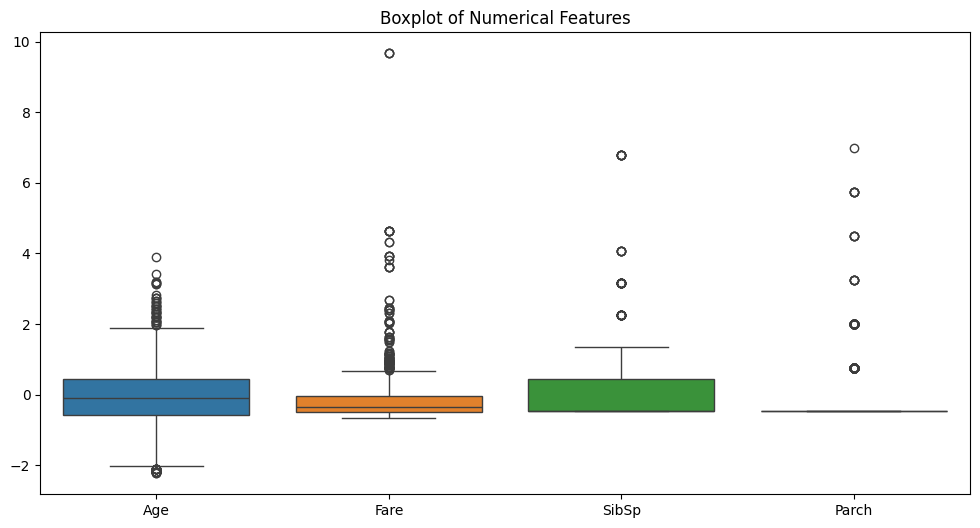


Preprocessing Completed. Shape of cleaned data: (820, 12)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("--- Dataset Info ---")
print(df.info())
print("\n--- Null Values ---")
print(df.isnull().sum())
print("\n--- Summary Statistics ---")
print(df.describe())

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1 female=0

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numerical Features')
plt.show()

from scipy import stats
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

df.to_csv("cleaned_titanic.csv", index=False)

print("\nPreprocessing Completed. Shape of cleaned data:", df.shape)
